In [94]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Link for data
path ='https://archive.ics.uci.edu/ml/datasets/Adult'


## Dataset
Data set was donated by Kohavi & Becker in 1996 and it is available at UCI Repository. This dataset contains more than 32,000 instances with combination of continuous and discrete. We have a csv file which contains only records and description file contains columns names.

## Problem Statement
To predict if the person is earning over 50k based on given data with different features that need to be considered for the classification. We have a column called ‘Target’ which Contains values ‘<=50k’ or ‘>50k’ and thus, we will be predicting weather a person is earning above 50k or below 50k.




## Table of Content <a class="anchor" id="top"></a>
#### 1. [Libraries](#libraries)
#### 2. [Data Acuisition and Data Extraction](#extraction)
#### 3. [Missing Values](#missingvalues)
#### 4. [Exploratory Data Analysis (EDA)](#eda)


##### a. [Target Column](#target)
##### b. [Univariate Analysis](#univariate)
##### c. [Multivariate Analysis](#multivariate)


#### 5. [Libraries for Preprocessing](#preprocessing)
#### 6. [Supervised Model](#supervised)
#### 7. [Libraries for Data preprocessing](#preprocessing)
#### 8. [Supervised Models](#supervisedmodel)
#### 9. [Metrics](#metrics)
#### 10. [Data Pipeline for Supervised Models](#sv_datapipeline)
#### 11. [Train Test Split](#traintestsplit)
#### 12. [Result Analysis for Supervised models](#result_sv)
#### 13. [Semi Supervised Models](#semisupervisedmodels)
#### 14. [Data Pipeline for Semi supervised models](#datapipeline_ssv)
#### 15.[Result Analysis for Semi supervised model](#result_ssv)
#### 16.[Conclusion](#conclusion)

# Libraries <a class='anchor' id='libraries'><a/>
    
[back to top](#top)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# function to print bold text
def print_bold(text):
    print('\033[1m' + text + '\033[0m')
    return ''



## Data Acquisition and Data Extraction <a class="anchor" id="extraction"></a>


[back to top](#top)

In [3]:
train = pd.read_csv('adult.data',header=None)
column_names = {0:'age',1:'workclass',2:'fnlwgt',3:'education',4:'education-num',5:'marital-status',
                6:'occupation',7:'relationship',8:'race',9:'sex',10:'capital-gain',11:'capital-loss',
                12:'hours-per-week',13:'native-country',14:'target'}
train.rename(columns=column_names,inplace=True)
print(train.shape)

(32561, 15)


In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test = pd.read_csv('adult.test',header=None)
column_names = {0:'age',1:'workclass',2:'fnlwgt',3:'education',4:'education-num',5:'marital-status',
                6:'occupation',7:'relationship',8:'race',9:'sex',10:'capital-gain',11:'capital-loss',
                12:'hours-per-week',13:'native-country',14:'target'}
test.rename(columns=column_names,inplace=True)
print(test.shape)

(16281, 15)


In [7]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  target          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


## Missing Values <a class="anchor" id="missingvalues"></a>
[back to top](#top)

In [10]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [11]:
columns = train.columns

In [12]:
for col in columns:
    print(f"Column: {col.capitalize()}\n")
    
    print(train[col].unique())
    print("#####################################################")

Column: Age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
#####################################################
Column: Workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
#####################################################
Column: Fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]
#####################################################
Column: Education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
#####################################################
Column: Education-num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
#####################################################
Colu

In [13]:
train.replace({' ?':np.nan},inplace=True)

In [14]:
train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
test.replace({' ?':np.nan},inplace=True)

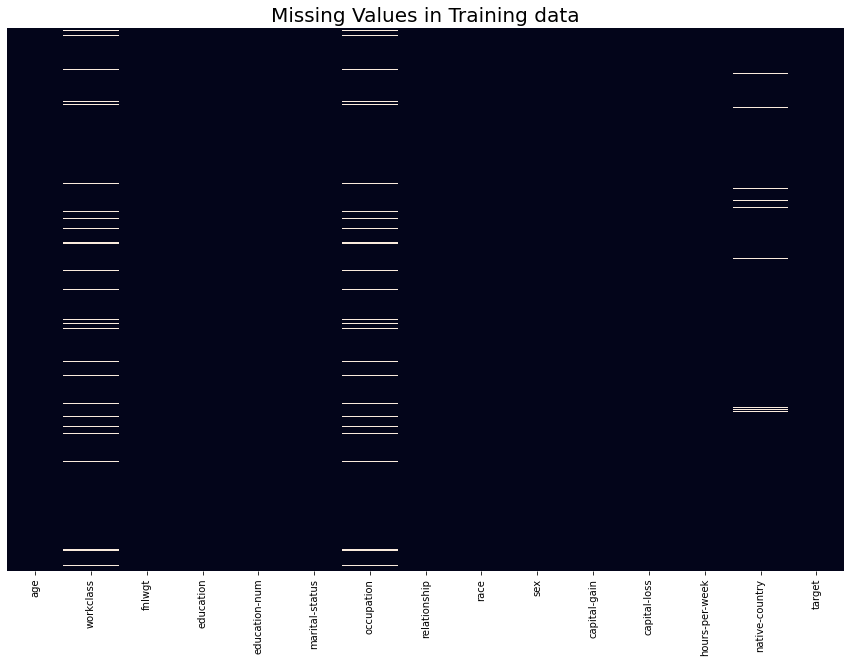

Missing values percantage in Test data:
age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
target            0.000000
dtype: float64


In [16]:
plt.figure(figsize=(15,10))

sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.title("Missing Values in Training data",fontsize=20)
plt.show()
print(f"Missing values percantage in Test data:\n{train.isnull().sum()/train.shape[0]}")


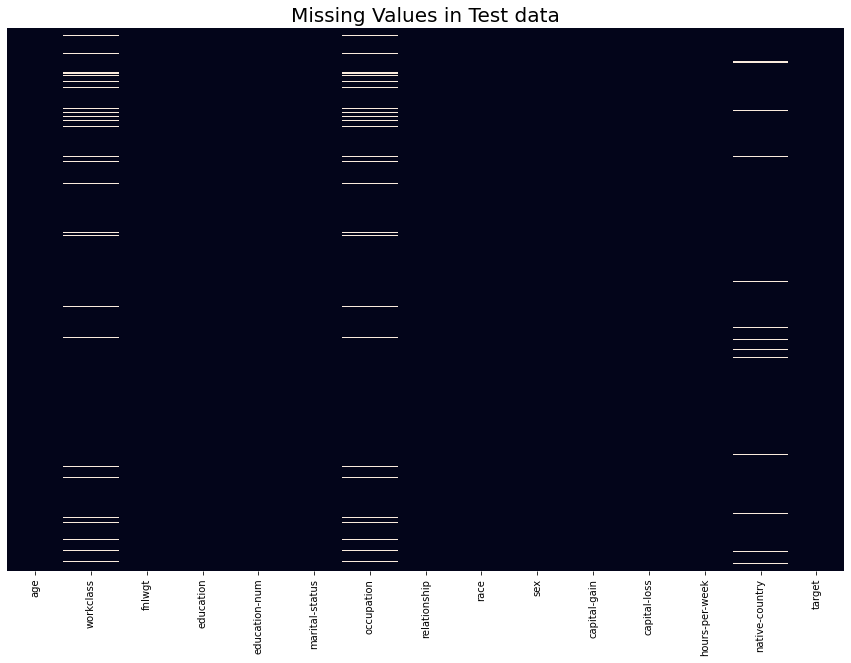

Missing values percantage in Test Data:
age               0.000000
workclass         0.059149
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.059333
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.016829
target            0.000000
dtype: float64


In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
plt.title("Missing Values in Test data",fontsize=20)
plt.show()
print(f"Missing values percantage in Test Data:\n{test.isnull().sum()/test.shape[0]}")

## Defined Target and Predictors 
[back to top](#top)

In [18]:
TARGET = 'target'
predictors_columns = [col for col in train.columns if col not in [TARGET]]
numerical_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical_columns = [col for col in predictors_columns if col not in numerical_columns]


print(f"Target: {TARGET}\n")
print(f"Predictors columns: \n{predictors_columns}\n")
print(f"Numerical columns: \n{numerical_columns}\n")
print(f"Categorical columns: \n{categorical_columns}")

Target: target

Predictors columns: 
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

Numerical columns: 
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical columns: 
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


## Exploratory Data Analysis (EDA)  <a class="anchor" id="eda"></a>

### Target Column <a class="anchor" id="target"><a/>
[back to top](#top)

In [19]:
train['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [20]:
train['target'] = train['target'].map({' <=50K':0,' >50K':1})

In [21]:
train['target']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target, Length: 32561, dtype: int64

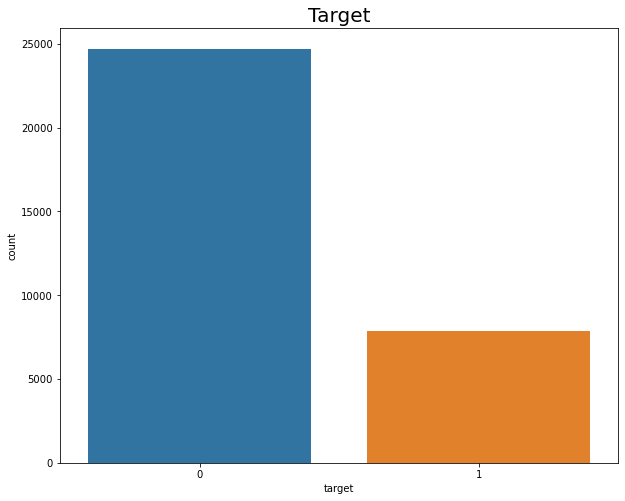

Percentage of classes: 
0    0.75919
1    0.24081
Name: target, dtype: float64


In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='target',data=train)
plt.title('Target',fontsize=20)
plt.show()
print(f"Percentage of classes: \n{train['target'].value_counts()/train.shape[0]}")


## Observation
The target column is imbalanced which can impact our model performance, Hence we will perform undersampling to balance the target column

## UnderSampling 

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

X = train[predictors_columns]
y = train[TARGET]

# Apply random undersampling to balance the dataset
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)




# Check the class distribution after undersampling
print("Original class distribution:\n",y.value_counts())
print("Resampled class distribution:\n",y_resampled.value_counts())


Original class distribution:
 0    24720
1     7841
Name: target, dtype: int64
Resampled class distribution:
 0    7841
1    7841
Name: target, dtype: int64


## Univariate Analysis <a class="anchor" id="univariate"></a>
### Categorical columns
[back to top](#top)

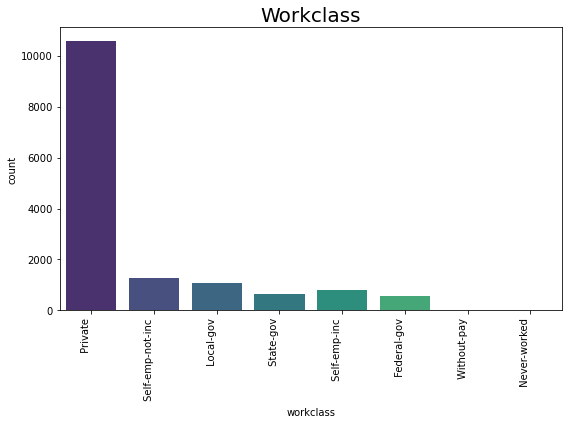

               index  workclass
0            Private      22696
1   Self-emp-not-inc       2541
2          Local-gov       2093
3          State-gov       1298
4       Self-emp-inc       1116
5        Federal-gov        960
6        Without-pay         14
7       Never-worked          7


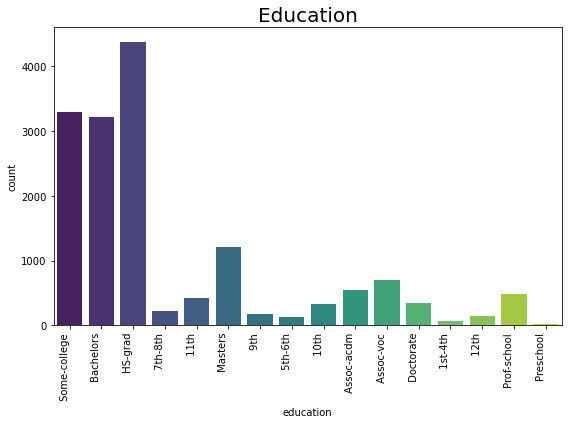

            index  education
0         HS-grad      10501
1    Some-college       7291
2       Bachelors       5355
3         Masters       1723
4       Assoc-voc       1382
5            11th       1175
6      Assoc-acdm       1067
7            10th        933
8         7th-8th        646
9     Prof-school        576
10            9th        514
11           12th        433
12      Doctorate        413
13        5th-6th        333
14        1st-4th        168
15      Preschool         51


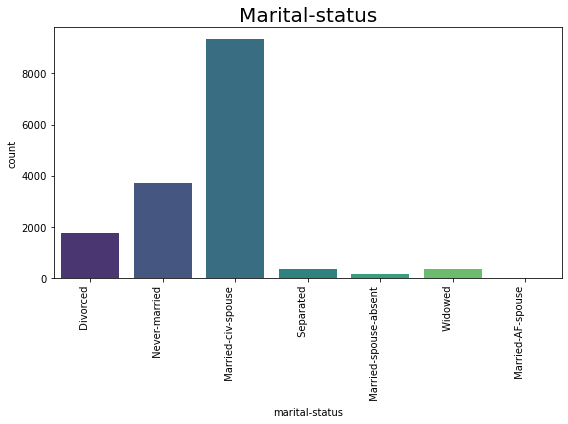

                    index  marital-status
0      Married-civ-spouse           14976
1           Never-married           10683
2                Divorced            4443
3               Separated            1025
4                 Widowed             993
5   Married-spouse-absent             418
6       Married-AF-spouse              23


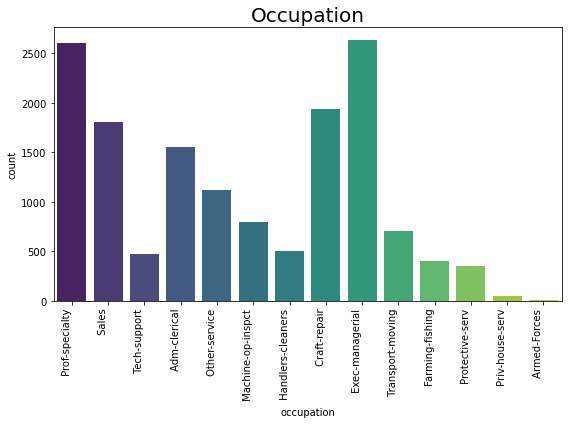

                 index  occupation
0       Prof-specialty        4140
1         Craft-repair        4099
2      Exec-managerial        4066
3         Adm-clerical        3770
4                Sales        3650
5        Other-service        3295
6    Machine-op-inspct        2002
7     Transport-moving        1597
8    Handlers-cleaners        1370
9      Farming-fishing         994
10        Tech-support         928
11     Protective-serv         649
12     Priv-house-serv         149
13        Armed-Forces           9


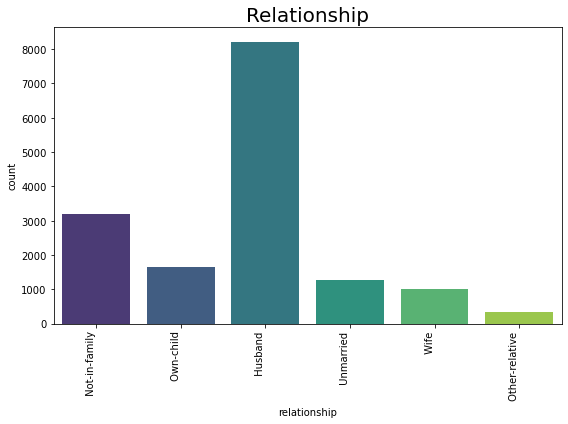

             index  relationship
0          Husband         13193
1    Not-in-family          8305
2        Own-child          5068
3        Unmarried          3446
4             Wife          1568
5   Other-relative           981


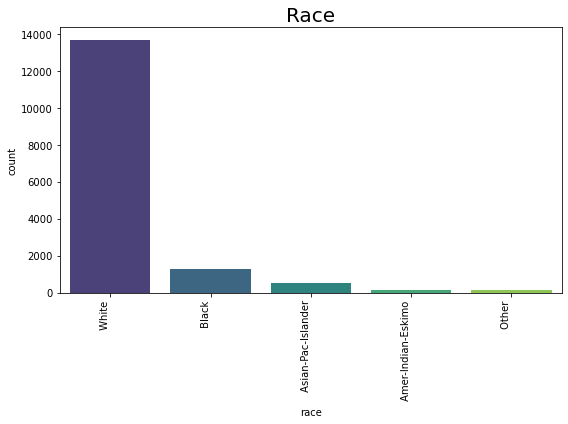

                 index   race
0                White  27816
1                Black   3124
2   Asian-Pac-Islander   1039
3   Amer-Indian-Eskimo    311
4                Other    271


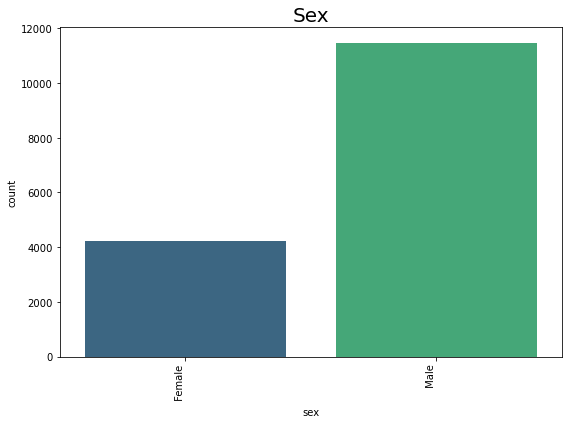

     index    sex
0     Male  21790
1   Female  10771


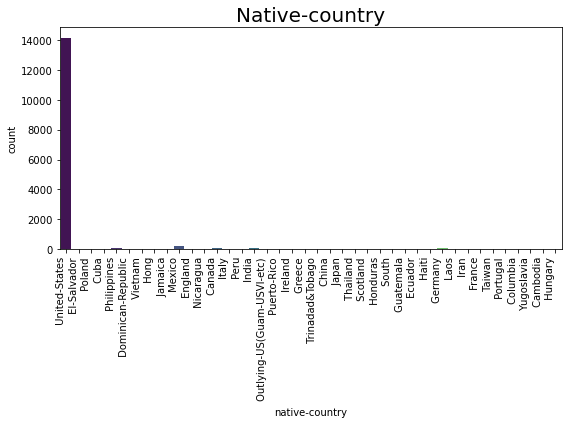

                          index  native-country
0                 United-States           29170
1                        Mexico             643
2                   Philippines             198
3                       Germany             137
4                        Canada             121
5                   Puerto-Rico             114
6                   El-Salvador             106
7                         India             100
8                          Cuba              95
9                       England              90
10                      Jamaica              81
11                        South              80
12                        China              75
13                        Italy              73
14           Dominican-Republic              70
15                      Vietnam              67
16                    Guatemala              64
17                        Japan              62
18                       Poland              60
19                     Columbia         

In [24]:
for col in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=X_resampled,x=col,palette='viridis')
    plt.title(col.capitalize(),fontsize=20,fontweight=10)
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()
    print(train[col].value_counts().reset_index())

In [25]:
X = X_resampled[categorical_columns].copy()
y = y_resampled

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int



MI Score:

relationship      0.165259
marital-status    0.151334
education         0.086523
occupation        0.081960
sex               0.046632
workclass         0.016506
race              0.012520
native-country    0.010356
Name: MI Scores, dtype: float64


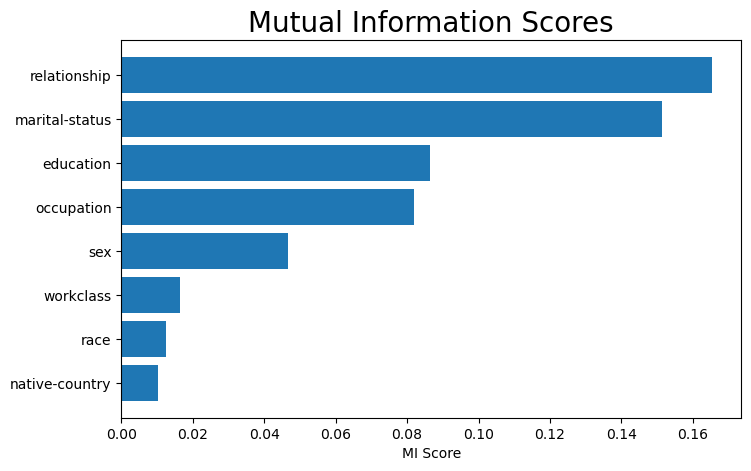

In [26]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(f"MI Score:\n\n{mi_scores[::]}") 


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.xlabel('MI Score')
    plt.title("Mutual Information Scores",fontsize=20,fontweight=20)


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


### Observation:
Looking at the Mutual Information plot and then Individual plots for `Native-Country` and `Race` we can think of droping them

#### Numerical Columns

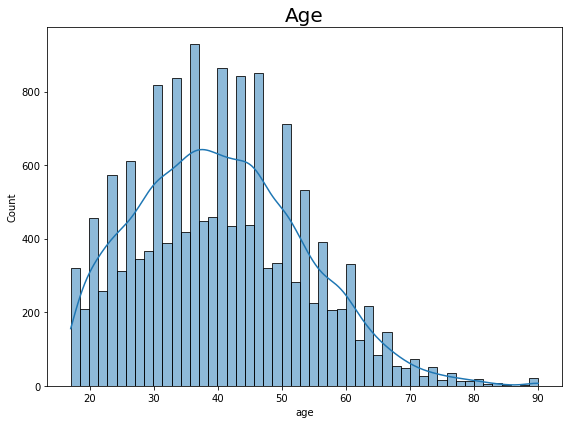

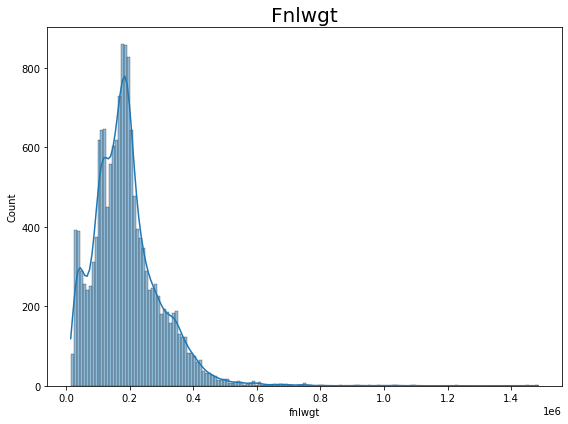

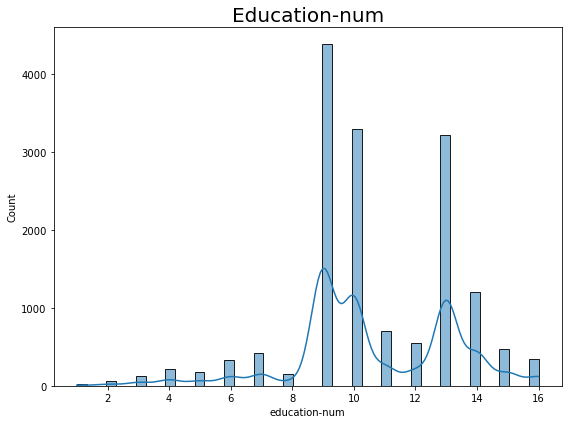

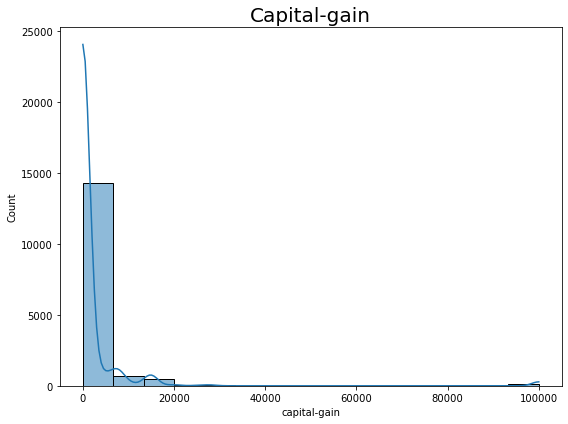

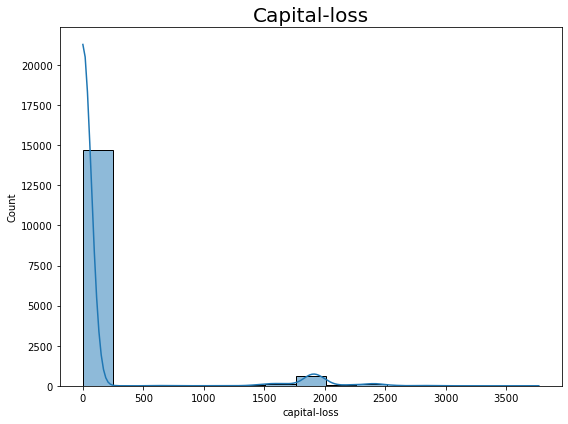

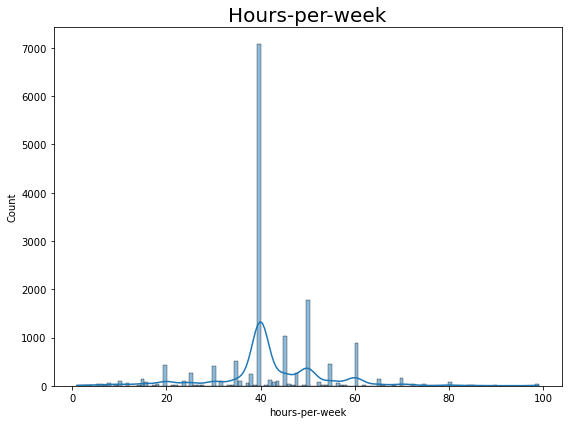

In [27]:
for col in numerical_columns:
    
    plt.figure(figsize=(8,6))
    sns.histplot(x=col,data=X_resampled,kde=True)
    plt.title(col.capitalize(),fontsize=20,fontweight=20)
    plt.tight_layout()
    plt.show()
    

<AxesSubplot:>

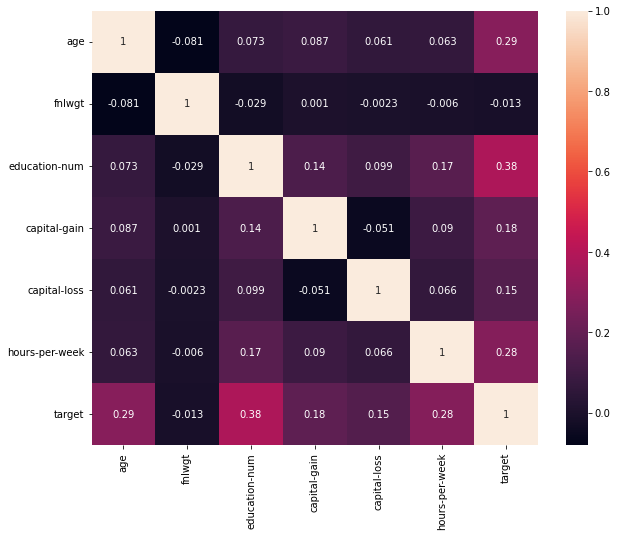

In [28]:
train_resampled = pd.concat([X_resampled,y_resampled],axis=1)
cor = train_resampled.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

In [29]:
index = cor.index[:-1]
values = cor.values[6,:-1]
np.absolute(values)

pd.Series(np.absolute(values),index=index).sort_values()

fnlwgt            0.012718
capital-loss      0.151505
capital-gain      0.183824
hours-per-week    0.278935
age               0.286991
education-num     0.380628
dtype: float64

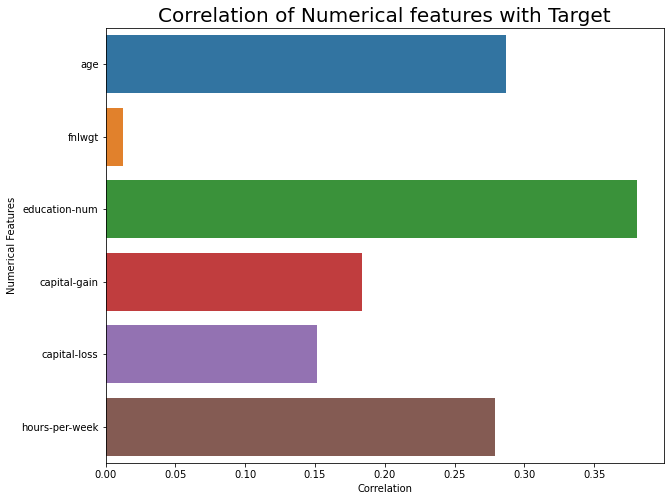

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y=index,x=np.absolute(values))
plt.title('Correlation of Numerical features with Target',fontsize=20,fontweight=20)
plt.xlabel('Correlation')
plt.ylabel('Numerical Features')
plt.show()
print("\n\n")

### Multivariate Analysis <a class="anchor" id="multivariate"></a>
#### Categorical columns 
[back to top](#top)

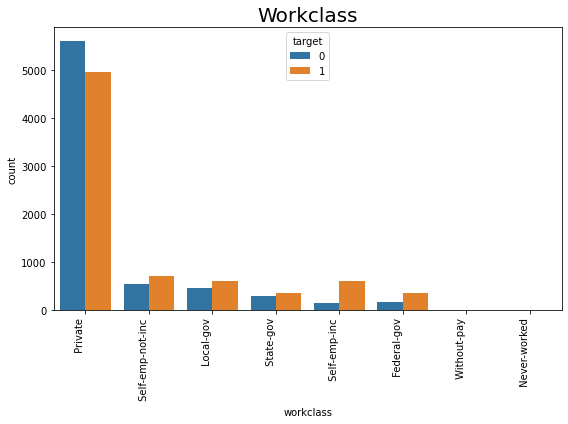

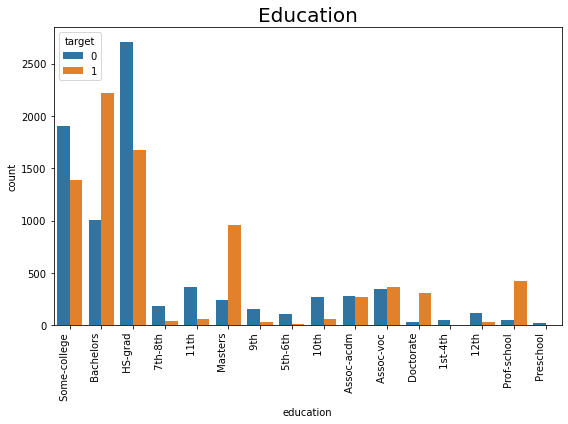

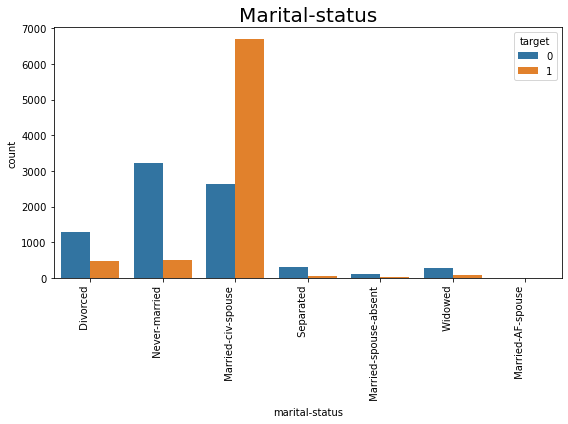

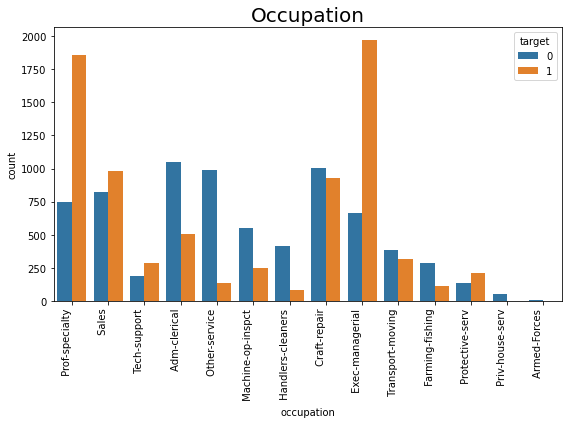

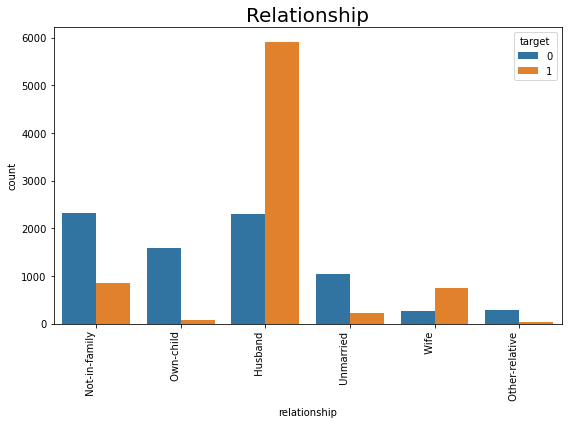

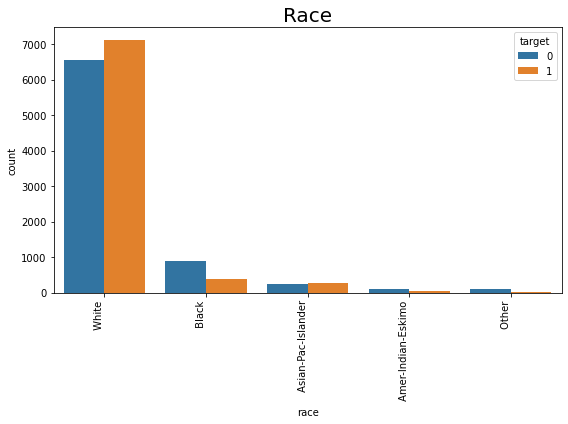

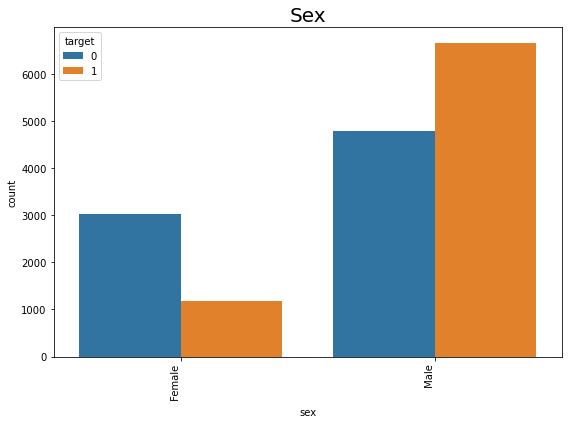

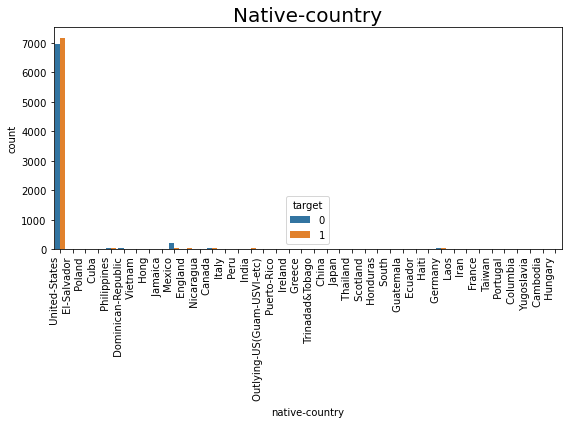

In [31]:
for col in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col,data=train_resampled,hue=TARGET)
    plt.xticks(rotation=90,ha='right')
    plt.title(col.capitalize(),fontsize=20,fontweight=20)
    plt.tight_layout()

## Observation
We will drop `Native Country` and `Race` feature from as observed from earlier analysis and concluding from above plots 

And we will drop `education` column as we have similar `education-num` column

In [32]:
def drop_columns(columns_name,data,numerical_col=False,categorical_col=False):
    """
    columns_name = name of the column to be dropped
    data = name of the dataframe
    numrical_col = False(default) set to True if column is numerical
    categorical_col = False(default) set to True if column is categorical
    
    The function drops columns from dataset, 
    predictors list and numerical or categorical list(whichever applicable)
    
    """
    
    for col in columns_name:
        data.drop(col,axis=1,inplace=True)
        predictors_columns.remove(col)
        if numerical_col == True:
            numerical_columns.remove(col)
        if categorical_col == True:
            categorical_columns.remove(col)
        
        
    
    
    

In [33]:
drop_columns(['race','native-country','education'],train_resampled,categorical_col=True)

In [34]:
print(f"Columns: {train_resampled.columns}\n")
print(f"Predictors: {predictors_columns}\n")
print(f"Numerical Columns: {numerical_columns}\n")
print(f"Categorical Columns: {categorical_columns}\n")

Columns: Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target'],
      dtype='object')

Predictors: ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical Columns: ['workclass', 'marital-status', 'occupation', 'relationship', 'sex']



#### Numerical Columns

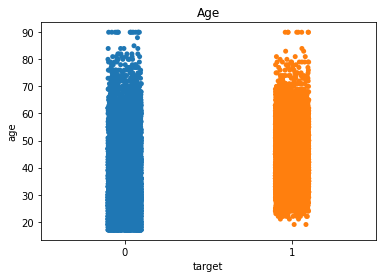

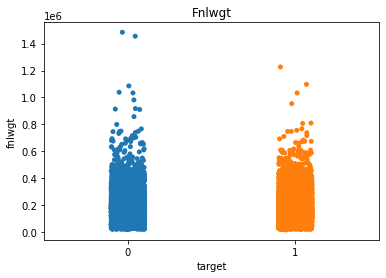

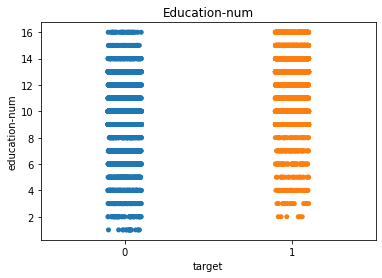

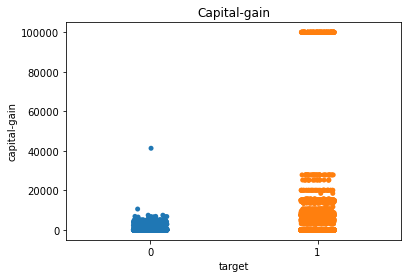

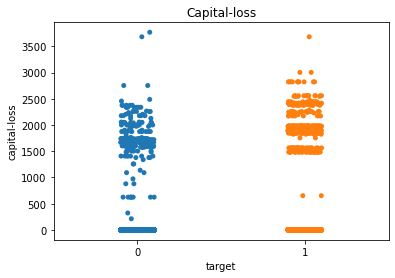

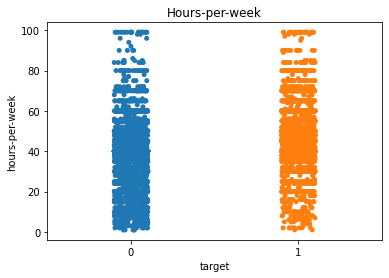

In [35]:
for col in numerical_columns:
    sns.stripplot(x=TARGET,y=col,data=train_resampled)
    plt.title(col.capitalize())
    plt.show()

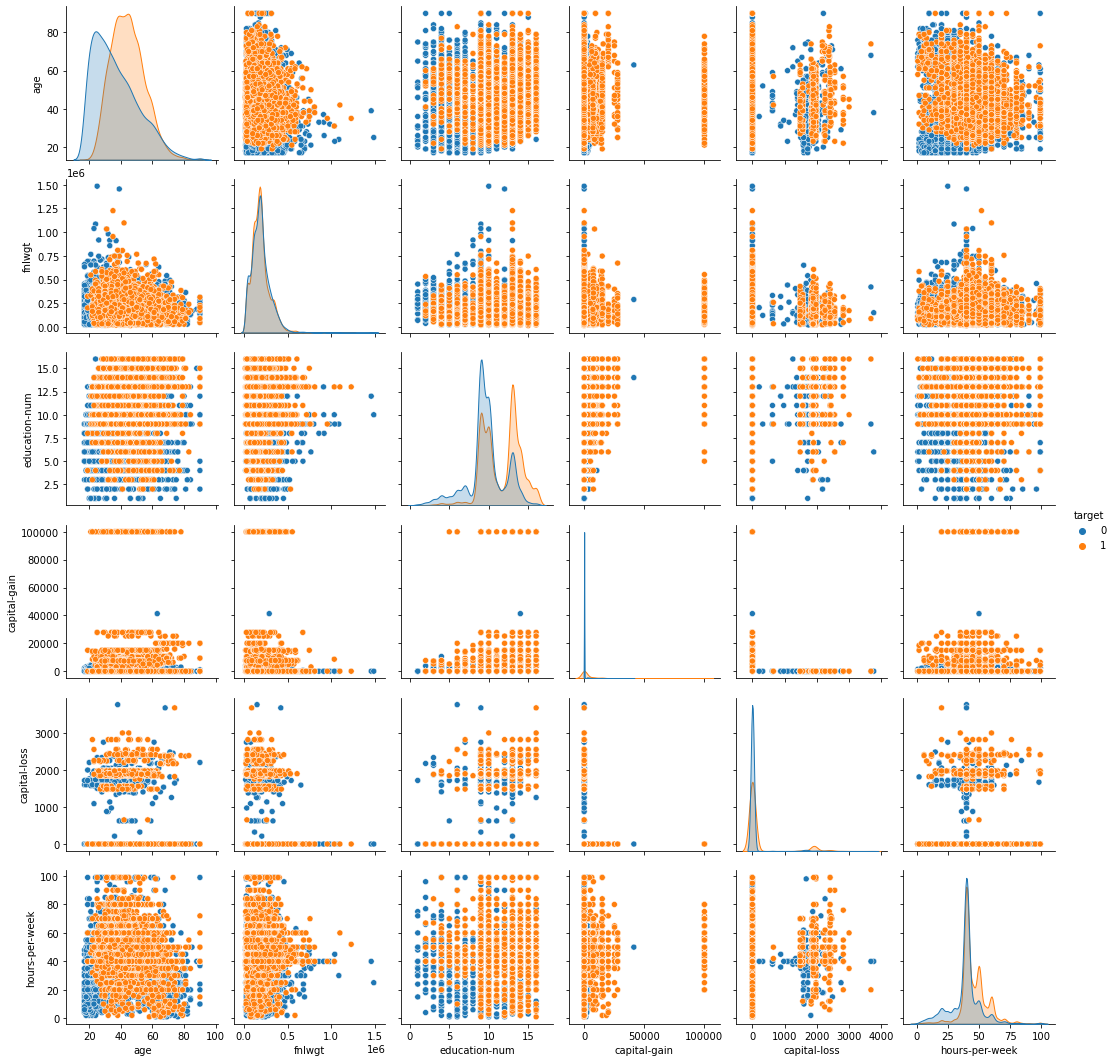

In [36]:
sns.pairplot(data=train_resampled,hue=TARGET)

## Observation
We will keep all numerical columns as they add some importance with respect to our `Target` and we can see clear seperation with respect to `Target` class

## Libraries for Preprocessing <a class="anchor" id="preprocessing"></a>
[back to top](#top)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Supervised model <a class="anchor" id="supervisedmodel"></a>
[back to top](#top)

In [ ]:
Logistic Regression:
Reason for selection: Its a simple and interpretable algorithm and it can handle binary classification tasks and can provide a probability score for each prediction.

Working: Logistic regression works by estimating the coefficients of the input features using a mathematical function called the logistic function. Once the coefficients have been estimated, we can use them to predict the probability of a given input belonging to a particular output category.
Decision Tree:
Reason for selection: It is easy to interpret and can handle both categorical and numerical input features.

How it works: Decision trees work by splitting the feature space along the most informative features until each region contains only a single output category. Once the tree has been built, we can use it to predict the output category of a given input by following the path down the tree that corresponds to the input features.	


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()


## Metrics <a class="anchor" id="metrics"></a>
[back to top](#top)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


## Data Pipeline for Supervised Models <a class="anchor" id="sv_datapipeline"></a>
[back to top](#top)

In [77]:
def predictions(models, X_train, y_train, X_test, y_test ): 
    
    """
    models = [list] list of models
    X_train = training data
    y_train = lables for training data
    X_test = test/ validation data 
    y_test = lables for test/validation for training data
    
    The function accepts list of machine learning models ,
    X_train and y_train for training models
    X_test and y_test for validating the model performance
    
    the function performs preprocessing the data, train the models and validate the models
    
    """
    numerical_transformer = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='mean')),
        ('scaling',StandardScaler())
        #('metrix',csgraph.laplacian(X, normed=False).toarray())
    ])


    categorical_transformer = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encoding',OneHotEncoder(handle_unknown='ignore'))
        #('metrix',csgraph.laplacian(X, normed=False).toarray())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num',numerical_transformer,numerical_columns),
        ('cat',categorical_transformer,categorical_columns)
        
    ])

    f_score = []
    y_pred = []
    
    for model in models:
        my_pipeline = Pipeline(steps=[
            ('preprocessing',preprocessor),
            ('model',model)
        ])
        score = cross_val_score(my_pipeline,X_train,y_train,cv=5,scoring='accuracy')
        print(f"{print_bold('Model:')} {model}")
        print(f"{print_bold('Cross Validation score:')} {score.mean()}\n")
        
        
        my_pipeline.fit(X_train, y_train)
        pred = my_pipeline.predict(X_test)
        y_pred.append(pred)
        
        
        
        
        
        
        print(f" {print_bold('Accuracy Score:')}{accuracy_score(pred,y_test)}\n")
        print(f"{print_bold('F1 Score:')} {f1_score(pred,y_test)}\n")
        print(f"{print_bold('Confusion Metrix:')}\n{confusion_matrix(pred,y_test)}")
        print(f"{print_bold('Classification Report:')}\n{classification_report(pred,y_test)}\n")
        
        print("#############################################################################")
        
        f_score.append(f1_score(pred,y_test))
        
        #sns.lineplot(data=df)
    return f_score
        



In [41]:
X = train_resampled[predictors_columns]
y = train_resampled[TARGET]


## Train Test Split <a class="anchor" id="traintestsplit"></a>
[back to top](#top)    


The training set was split into training and validation data using train_test_split() from sklearn. We did cross validation by dividing the data into ratio 70:30. Then we have a separate test data to test our final results.

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



print(f"{(predictors_columns)}\n")
print(f"{(categorical_columns)}\n")
print(f"{(numerical_columns)}\n")
print(f"{X_train.shape}")
print(f"{X_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")
    

['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

['workclass', 'marital-status', 'occupation', 'relationship', 'sex']

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

(10977, 11)
(4705, 11)
(10977,)
(4705,)


In [83]:
output = predictions([lr,dt],X_train,y_train,X_test,y_test)

Model:
 LogisticRegression(max_iter=1000)
Cross Validation score:
 0.8200794984461289

Accuracy Score:
 0.8187035069075451

F1 Score:
 0.8205343993267409

Confusion Metrix:

[[1902  402]
 [ 451 1950]]
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2304
           1       0.83      0.81      0.82      2401

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705


#############################################################################
Model:
 DecisionTreeClassifier()
Cross Validation score:
 0.7684272917003788

Accuracy Score:
 0.7738575982996811

F1 Score:
 0.7700950734658599

Confusion Metrix:

[[1859  570]
 [ 494 1782]]
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2429
           1       0.76      0.78      0.77 

In [84]:
final = pd.DataFrame({'model':['LogisticRegression()','DecisionTreeClassifier()'],'F1_score':output})

## Result Analysis for Supervised Models <a class="anchor" id="result_sv"></a>
[back to top](#top)

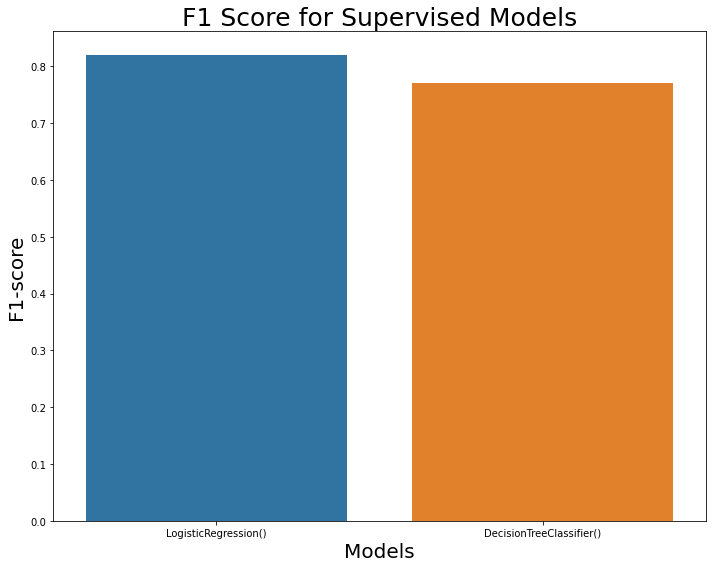

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='F1_score',data=final)
plt.title('F1 Score for Supervised Models',fontsize=25,fontweight=20)
plt.ylabel('F1-score',fontsize=20)
plt.xlabel("Models",fontsize=20)

plt.tight_layout()

# Semi Supervised Learning models <a class='anchor' id="semisupervisedmodels"><a/>
[back to top](#top)

### Self Training Classifier
	The Self-Training Classifier is a semi-supervised learning algorithm that can improve the performance of a classification model when only a limited amount of labeled data is available. The algorithm first trains the model on the labeled data and then uses it to predict labels for the unlabeled data. These predicted labels are added to the training set as "pseudo-labels," which can be used to retrain the model iteratively.
    
    
    Reason for selecting:Self-Training Classifier is useful when obtaining additional labeled data is difficult or expensive. It's also simple to integrate into existing classification pipelines.
    
    
    Working: Self-Training Classifier uses the predicted labels as if they are reliable and can improve the accuracy of the model


## Label Propagation 
	Label Propagation is a semi-supervised learning algorithm that uses a graph-based approach to propagate labels from the labeled data to the unlabeled data. The algorithm creates a graph where each data point is a node, and the edges represent the similarity between the data points.
    
    
    Reason for selecting and working: Label Propagation is useful when there's a smooth transition between different classes and can handle non-linear boundaries between classes.
    
    
    How it works: Label Propagation assigns labels to the labeled data points and then propagates them to the unlabeled data points based on the similarity between them.


## Label Spreading
	Label Spreading is a semi-supervised learning algorithm that is similar to Label Propagation, but it uses a diffusion process to propagate the labels from the labeled data to the unlabeled data. The algorithm creates a graph where each data point is a node, and the edges represent the similarity between the data points.
Reason for selecting:
	Label Spreading is useful when there are sharp boundaries between different classes and the labeled data points are not representative of the entire dataset.
Working:
	Label Spreading assigns labels to the labeled data points and then propagates them to the unlabeled data points using a diffusion process.

In [46]:
from sklearn import semi_supervised,svm

In [47]:
svc = svm.SVC(probability=True,gamma='auto')

model_svc = semi_supervised.SelfTrainingClassifier(svc)

model_lp = semi_supervised.LabelPropagation()

model_ls = semi_supervised.LabelSpreading()






## Data Pipeline for Semi supervised learning models <a class="anchor" id='datapipeline_ssv'></a>
[back to top](#top)

In [ ]:
def semi_supervised_predict(models,X_train,y_train,y_test):
    
    ## missing values
    si_num = SimpleImputer(strategy='mean')
    si_cat = SimpleImputer(strategy='most_frequent')
    
    sc = StandardScaler()

    X_train_cat = pd.DataFrame(si_cat.fit_transform(X_train[categorical_columns]))
    X_train_num = pd.DataFrame(si_num.fit_transform(X_train[numerical_columns]))
    
    # Simple drop columns 
    X_train_cat.columns = categorical_columns
    X_train_num.columns = numerical_columns

    X_train_cat = pd.get_dummies(X_train_cat,drop_first=True)
    X_train_num = pd.DataFrame(sc.fit_transform(X_train_num[numerical_columns]))
    X_train_num.columns = numerical_columns
    X_train_final = pd.concat([X_train_cat,X_train_num],axis=1)
    
    score = []
    for model in models:
        model.fit(X_train_final,y_train)
        pred = model.predict(X_train_final)
        
        print(f"{print_bold('Model:')}{model}\n")
        print(f"{print_bold('Accuracy score:')} {accuracy_score(y_test,pred)}\n")
        print(f"{print_bold('Confusion Metric:')}\n{confusion_matrix(y_test,pred)}\n")
        print(f"{print_bold('Classification report :')}\n{classification_report(y_test,pred)}\n")
        print(f"{print_bold('F1 score:')} {f1_score(y_test,pred,zero_division=1)}")
        print("############################################################################")
        score.append(f1_score(y_test,pred,zero_division=1))
    
    return score
              
        

In [49]:
test['target'] = test['target'].map({' <=50K.':0,' >50K.':1})

In [50]:
y_orig = test.target.copy()

In [51]:
test['target'] = -1

In [52]:
final = pd.concat([test,train_resampled])
y_final_test = pd.concat([y_orig,train_resampled['target']])

In [53]:
X_final = final[predictors_columns]

y_final = final[TARGET]


In [73]:
y_final[12000:27000].value_counts()

 0    7841
-1    4281
 1    2878
Name: target, dtype: int64

In [78]:
score_svc = predictions([model_svc],X_final[12000:27000], y_final[12000:27000], X_final[12000:27000],y_final_test[12000:27000])

Model:
 SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))
Cross Validation score:
 0.5988666666666667

Accuracy Score:
 0.8461333333333333

F1 Score:
 0.6753867791842475

Confusion Metrix:

[[10291  1517]
 [  791  2401]]
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11808
           1       0.61      0.75      0.68      3192

    accuracy                           0.85     15000
   macro avg       0.77      0.81      0.79     15000
weighted avg       0.86      0.85      0.85     15000


#############################################################################


In [70]:
score_lp = semi_supervised_predict([model_lp],X_final[12000:27000], y_final[12000:27000], y_final_test[12000:27000])

Model:
LabelPropagation()

Accuracy score:
 0.9296666666666666

Confusion Metric:

[[11033    49]
 [ 1006  2912]]

Classification report :

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     11082
           1       0.98      0.74      0.85      3918

    accuracy                           0.93     15000
   macro avg       0.95      0.87      0.90     15000
weighted avg       0.93      0.93      0.93     15000


F1 score:
 0.8466346852740223
############################################################################


/Users/jagpreetsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [71]:
score_ls = semi_supervised_predict([model_ls],X_final[12000:27000], y_final[12000:27000], y_final_test[12000:27000])

Model:
LabelSpreading()

Accuracy score:
 0.9296

Confusion Metric:

[[11032    50]
 [ 1006  2912]]

Classification report :

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     11082
           1       0.98      0.74      0.85      3918

    accuracy                           0.93     15000
   macro avg       0.95      0.87      0.90     15000
weighted avg       0.93      0.93      0.93     15000


F1 score:
 0.8465116279069769
############################################################################


/Users/jagpreetsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [91]:
score_ssv = score_svc + score_lp + score_ls 
models =['SelfTrainingClassifier()','LabelPropagation()','LabelSpreading()']
output_ssv = pd.DataFrame({'model':models,'F1_score':score_ssv})

## Result Analysis for Semi supervised Models <a class="anchor" id="result_ssv"></a>
[back to top](#top)

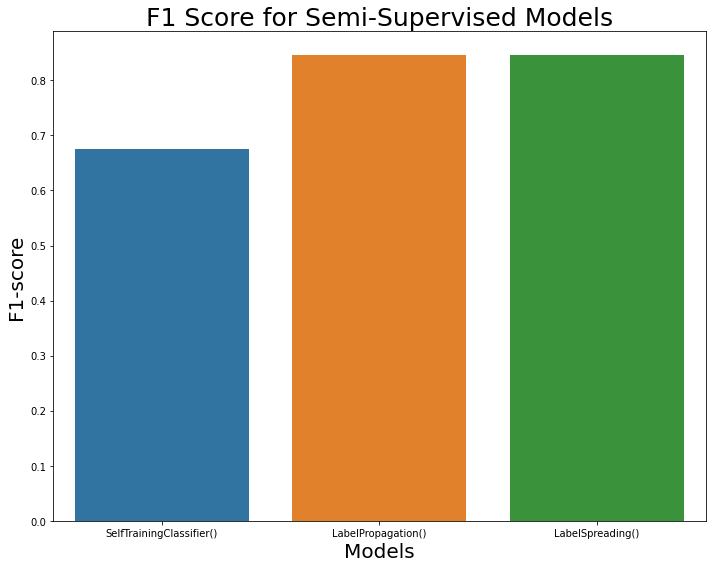

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='F1_score',data=output_ssv)
plt.title('F1 Score for Semi-Supervised Models',fontsize=25,fontweight=20)
plt.ylabel('F1-score',fontsize=20)
plt.xlabel("Models",fontsize=20)

plt.tight_layout()

   We got `f1 score` of `82%` for Logistic regression and `F1_score` of `77%` for `Decision Tree`  for Supervised models

For Semi-supervised learning models we got highest `f1 score` of `84%` for both `Label propagation` and `Label spreading` model whereas `Self Training model` only gives a F1 score of `67%`


## Working of Building a Regressor
We first trained supervised models on labeled data and calculated the F1 score to build the semi-supervised learning regressor. Then we prepared a semi-supervised learning model on labeled data and unlabelled data. The process includes data acquisition and extraction and the performed Exploratory Data Analysis for feature selection. Further data pipelines are used for pre-processing the data before it can be passed on to a Machine learning model.
Models are trained, and validation is performed using metrics like accuracy score, F1 score, precision, and recall.

The result from both supervised and semi-supervised learning are compared to see if semi-supervised is any better.


## Conclusion<a class="anchor" id="conclusion"></a>
[back to top](#top)


Semi-supervised learning is an interesting concept of combining both supervised and unsupervised learning technique, though the implementing semi-supervised learning is a costly operation due the sophisticated algorithms, but these can have practical application where acquiring more data is either not possible or is a costly operation.